In [266]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import data

In [267]:
df = pd.read_csv("/content/sample_data/phones.csv")

In [268]:
def no_accent_vietnamese(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', 'A', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[ÉÈẺẼẸÊẾỀỂỄỆ]', 'E', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', 'O', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[ÍÌỈĨỊ]', 'I', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ÚÙỦŨỤƯỨỪỬỮỰ]', 'U', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('[ÝỲỶỸỴ]', 'Y', s)
    s = re.sub('đ', 'd', s)
    s = re.sub('Đ', 'D', s)
    return s

In [269]:
def find_numeric_value(s):
    numeric_part = ""
    for char in s:
        if char.isdigit() or char == '.':
            numeric_part += char
        elif numeric_part:
            return float(numeric_part)
    return None

In [270]:
# Convert technicalDetail to separate columns
def convert_column_data(row):
  technical_data_list = eval(row['technicalDetail'])
  data_dict = {item['title']: item['value'] for item in technical_data_list}
  return pd.Series(data_dict)

In [271]:
extracted_columns = df.apply(convert_column_data, axis=1)
old_column_names = extracted_columns.columns
new_column_names = [no_accent_vietnamese(col).lower() for col in old_column_names]
mapping = {old: new for old, new in zip(old_column_names, new_column_names)}
extracted_columns.rename(columns=mapping, inplace=True)
df = pd.concat([df, extracted_columns], axis=1)
df.drop(columns=['technicalDetail'], inplace=True)

<ipython-input-270-53891391077c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(data_dict)
<ipython-input-270-53891391077c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(data_dict)
<ipython-input-270-53891391077c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(data_dict)
<ipython-input-270-53891391077c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(data_dict)
<ipython-input-270-53891391077c>:5: FutureWarning: The default dtype for empty Series will b

# EDA

In [272]:
df.head()

,ID,pName,tradePrice,actualPrice,salePrice,brand,productLine,rating,url,,...,thoi diem ra mat,tien ich khac,trong luong,tinh nang camera,tinh nang man hinh,tinh nang dac biet,tuong thich,tan so quet,wi-fi,do phan giai man hinh
0,1,Samsung Galaxy S23 Ultra 256GB,25490000.0,31990000.0,25990000.0,Samsung,Galaxy S,5.0/5,https://cellphones.com.vn/samsung-galaxy-s23-u...,NaN,...,NaN,"Samsung DeX, Samsung Wireless DeX, trợ lí ảo B...",234 g,Quay Siêu chậm (Super Slow Motion)\nChuyên ngh...,"120Hz, HDR10+, 1750 nits, Gorilla Glass Victus 2","Hỗ trợ 5G, Sạc không dây, Bảo mật vân tay, Nhậ...",Bút S-Pen,120Hz,"Wi-Fi 802.11 a/b/g/n/ac/6e, tri-band, Wi-Fi Di...",1440 x 3088 pixels (QHD+)
1,2,Xiaomi Redmi Note 12 8GB 128GB,4790000.0,5790000.0,5290000.0,Xiaomi,Redmi,NaN,https://cellphones.com.vn/xiaomi-redmi-note-12...,NaN,...,NaN,"Mở khoá khuôn mặt, Mở khoá vân tay cạnh viền",NaN,Chân dung\nToàn cảnh\nChế độ chuyên nghiệp\nCh...,"Tần số quét 120Hz, độ sáng 1200nits\nCorning® ...",NaN,NaN,NaN,802.11 a/b/g/n/ac,1080 x 2400 pixels (FullHD+)
2,3,iPhone 14 Pro Max 128GB | Chính hãng VN/A,24390000.0,29990000.0,26390000.0,Apple,iPhone 14 Series,5.0/5,https://cellphones.com.vn/iphone-14-pro-max.html,NaN,...,NaN,Phát hiện va chạm (Crash Detection)\nMàn hình ...,240 gr,"Quay phim Cinematic, Chế độ ProRes, Quay phim ...","120Hz, Always-On display, HDR, True Tone, Hapt...","Hỗ trợ 5G, Sạc không dây, Nhận diện khuôn mặt,...",NaN,120Hz,"Wi-Fi MIMO, Dual-band (2.4 GHz/5 GHz), Wi-Fi 8...",2796 x 1290-pixel
3,4,iPhone 13 128GB | Chính hãng VN/A,15290000.0,18990000.0,16290000.0,Apple,iPhone 15 - 25 triệu,4.8/5,https://cellphones.com.vn/iphone-13.html,NaN,...,NaN,NaN,174g,Chạm lấy nét\nHDR\nNhận diện khuôn mặt\nQuay c...,"Màn hình super Retina XDR, OLED, 460 ppi, HDR ...","Hỗ trợ 5G, Sạc không dây, Nhận diện khuôn mặt,...",NaN,60Hz,Wi‑Fi 6 (802.11ax),2532 x 1170 pixels
4,5,Xiaomi Redmi Note 12 4GB 128GB,3890000.0,4990000.0,4390000.0,Xiaomi,Redmi,4.9/5,https://cellphones.com.vn/xiaomi-redmi-note-12...,NaN,...,NaN,"Mở khoá khuôn mặt, Mở khoá vân tay cạnh viền",NaN,Chân dung\nToàn cảnh\nChế độ chuyên nghiệp\nCh...,"Tần số quét 120Hz, độ sáng 1200nits\nCorning® ...",NaN,NaN,NaN,802.11 a/b/g/n/ac,1080 x 2400 pixels (FullHD+)


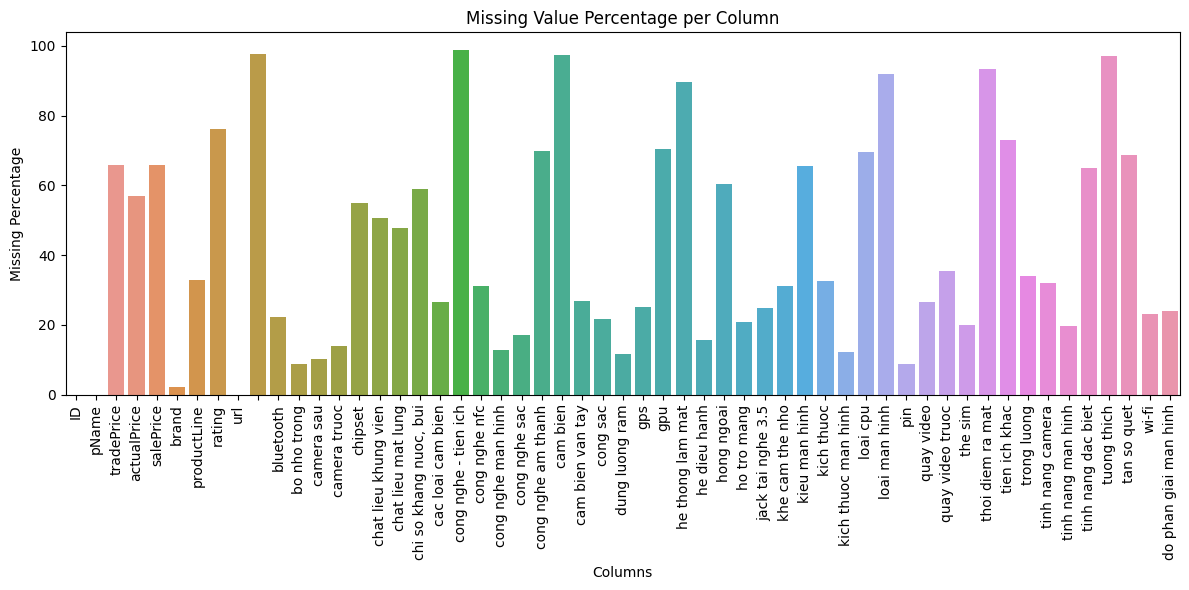

ID                         0.000000
pName                      0.000000
tradePrice                65.968586
actualPrice               57.068063
salePrice                 65.968586
brand                      2.094241
productLine               32.984293
rating                    76.178010
url                        0.000000
                          97.643979
bluetooth                 22.251309
bo nho trong               8.900524
camera sau                10.209424
camera truoc              13.874346
chipset                   54.973822
chat lieu khung vien      50.523560
chat lieu mat lung        47.643979
chi so khang nuoc, bui    58.900524
cac loai cam bien         26.439791
cong nghe - tien ich      98.952880
cong nghe nfc             31.151832
cong nghe man hinh        12.827225
cong nghe sac             17.015707
cong nghe am thanh        69.895288
cam bien                  97.382199
cam bien van tay          26.963351
cong sac                  21.727749
dung luong ram            11

In [273]:
def missing_statistic(df):
  cols = df.columns
  missing_counts = df.isnull().sum()
  missing_percent = missing_counts / len(df) *100
  missing_info = pd.DataFrame({'percentage': missing_percent}, index=cols)
  plt.figure(figsize=(12, 6))
  sns.barplot(y=missing_info['percentage'], x=missing_info.index)
  plt.xticks(rotation=90)
  plt.title('Missing Value Percentage per Column')
  plt.xlabel('Columns')
  plt.ylabel('Missing Percentage')
  plt.tight_layout()
  plt.show()
  print(missing_percent)
  # mean = np.mean(missing_info['percentage'])
  # print("Mean missing percentage: ",mean)

missing_statistic(df)


In [274]:
df['pName'] = df['pName'].apply(lambda x: no_accent_vietnamese(x).lower())

**Rating processing**

In [275]:
df['rating'] = pd.to_numeric(df['rating'].str.split('/').str[0])
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['rating'] = df['rating'].apply(lambda x: "{:.1f}".format(x))
df['rating'].value_counts()

4.8    301
5.0     47
4.9      9
4.5      7
4.0      6
4.6      4
4.3      4
4.7      2
4.2      1
4.4      1
Name: rating, dtype: int64

**Brand processing**

In [276]:
df['brand'] = df['brand'].astype(str).apply(lambda x: no_accent_vietnamese(x).lower())
df['brand'] = np.where(df['brand'] == "Tin don - Moi ra", df['productLine'], df['brand'])
df['brand'].fillna(df['productLine'], inplace=True)
df['brand'].fillna("missing", inplace=True)

<Axes: >

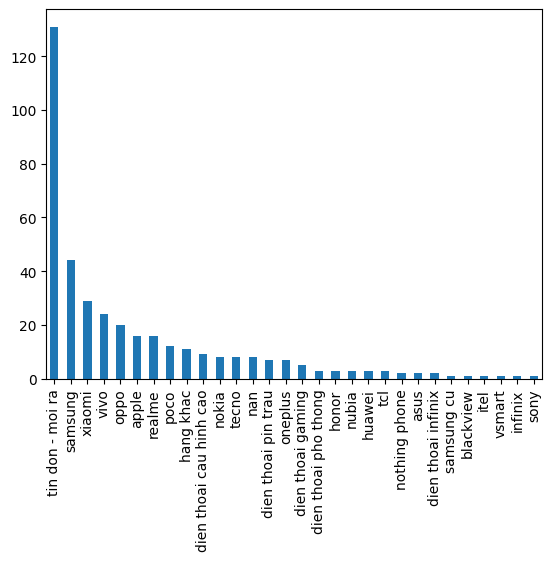

In [277]:
df['brand'].value_counts().plot(kind='bar')

**Product Line missing-filling**

In [278]:
df['productLine'].fillna(df['brand'], inplace=True)
df['productLine'] = df['productLine'].apply(lambda x: no_accent_vietnamese(x).lower())

**ROM preprocessing**

In [279]:
df['bo nho trong'] = df['bo nho trong'].astype(str).apply(lambda x: "0.128 GB" if x == "128 MB" else ("1000 GB" if x == "1 TB" else x))
df['bo nho trong'] = df['bo nho trong'].apply(find_numeric_value)
rom_mean = math.floor(df['bo nho trong'].mean())
df['bo nho trong'].fillna(rom_mean, inplace = True)

**RAM processing**

In [280]:
df['dung luong ram'] = df['dung luong ram'].astype(str).apply(find_numeric_value)
ram_mean = math.ceil(df['dung luong ram'].mean())
df['dung luong ram'].fillna(ram_mean, inplace = True)

**Camera data processing with TFIDF to extract keywords**

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=15, tokenizer=lambda text: text.split())

In [282]:
df['camera sau'] = df['camera sau'].astype(str).apply(lambda x: no_accent_vietnamese(x.replace('\n' or ', ' or ': ',' ').replace(':', '').replace(' mp','mp').strip().lower()))
documents = df['camera sau'].astype(str)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
keywords = tfidf_vectorizer.get_feature_names_out()
df['camera sau'] = df['camera sau'].apply(lambda x: ' '.join(keyword for keyword in keywords if keyword and keyword in x))

df['camera sau'].fillna('thieu', inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [283]:
df['camera truoc'] = df['camera truoc'].astype(str).apply(lambda x: no_accent_vietnamese(x.replace('\n' or ', ' or ': ',' ').replace(':', '').replace(' mp','mp').strip().lower()))
documents = df['camera sau'].astype(str)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
keywords = tfidf_vectorizer.get_feature_names_out()
df['camera truoc'] = df['camera truoc'].apply(lambda x: ' '.join(keyword for keyword in keywords if keyword and keyword in x))

df['camera truoc'].fillna('thieu', inplace=True)

**Battery**

In [284]:
# 4.000 or 4,000
df['pin'] = df['pin'].astype(str).apply(lambda x: find_numeric_value(no_accent_vietnamese(x.replace('.' or ',',''))))

**Price processing**

In [285]:
df['actualPrice'].value_counts()

3990000.0     6
17990000.0    5
4490000.0     5
18990000.0    5
4990000.0     5
             ..
3390000.0     1
23490000.0    1
40990000.0    1
5790000.0     1
2000000.0     1
Name: actualPrice, Length: 77, dtype: int64

In [286]:
sorted_df = df['salePrice'].sort_values(ascending=True)

quantiles = [0, 0.25, 0.5, 0.75, 1]
quantile_values = sorted_df.quantile(quantiles)

quantile_values

0.00      650000.0
0.25     4190000.0
0.50     6890000.0
0.75    14965000.0
1.00    41990000.0
Name: salePrice, dtype: float64

In [287]:
def price_discretization(price):
    if price <= 5000000:
        return 'low'
    elif price <= 10000000:
        return 'middle'
    elif price <= 20000000:
        return 'midhigh'
    else:
        return 'high'

In [288]:
df['actualPrice'] = df.apply(lambda row: row['salePrice'] if not pd.isnull(row['salePrice']) else (
        row['tradePrice'] if not pd.isnull(row['tradePrice']) else row['actualPrice']), axis=1
)

In [289]:
df['actualPrice_discreted'] = df['actualPrice'].apply(price_discretization)

In [290]:
from scipy.stats import chi2_contingency

contingency_table_pL = pd.crosstab(df['productLine'], df['actualPrice_discreted'])
contingency_table_ram = pd.crosstab(df['dung luong ram'], df['actualPrice_discreted'])
contingency_table_rom = pd.crosstab(df['bo nho trong'], df['actualPrice_discreted'])
contingency_table_brand = pd.crosstab(df['brand'], df['actualPrice_discreted'])

# Check correlation with productLine
stat_pL, p_pL, dof_pL, expected_pL = chi2_contingency(contingency_table_pL)
print("p value for productLine contingency table: " + str(p_pL))

# Check correlation with ram
stat_ram, p_ram, dof_ram, expected_ram = chi2_contingency(contingency_table_ram)
print("p value for dung luong ram contingency table: " + str(p_ram))

# Check correlation with rom
stat_rom, p_rom, dof_rom, expected_rom = chi2_contingency(contingency_table_rom)
print("p value for bo nho trong contingency table: " + str(p_rom))

# Check correlation with brand
stat_brand, p_brand, dof_brand, expected_brand = chi2_contingency(contingency_table_brand)
print("p value for brand contingency table: " + str(p_brand))

p value for productLine contingency table: 7.081277965385232e-40
p value for dung luong ram contingency table: 7.807010384930493e-25
p value for bo nho trong contingency table: 1.363404802017438e-16
p value for brand contingency table: 3.3657187271129524e-40


In [291]:
price_by_categories = df.groupby(['bo nho trong', 'dung luong ram', 'brand'])['actualPrice'].mean()

def fill_missing_price(row):
    if pd.isnull(row['actualPrice']):
        return price_by_categories.get((row['bo nho trong'], row['dung luong ram'], row['brand']), None)
    return row['actualPrice']

df['actualPrice'] = df.apply(fill_missing_price, axis=1)

In [292]:
df['actualPrice'] = df['actualPrice'].fillna(df['actualPrice'].mean()).apply(price_discretization)

**Water-proof**

In [293]:
df['chi so khang nuoc, bui'] = df['chi so khang nuoc, bui'].apply(lambda x: 0 if pd.isna(x) or x=="Khong co" or x=="Khong" else 1)

**Screen size**

In [294]:
df['kich thuoc man hinh'] = df['kich thuoc man hinh'].astype(str).apply(find_numeric_value)
df['kich thuoc man hinh'].fillna(0, inplace=True)

# Recommendation

In [295]:
df = df[["pName", "actualPrice", "brand", "productLine", "rating", "kich thuoc man hinh", "pin", "bo nho trong", "dung luong ram", "chi so khang nuoc, bui"]]
columns = ['pName','brand', 'productLine', 'rating', 'kich thuoc man hinh', 'pin' , 'bo nho trong', 'dung luong ram', 'actualPrice', 'chi so khang nuoc, bui']
df['bag_of_words'] = df.apply(lambda row: ' '.join(str(row[col]) for col in columns), axis=1)

<ipython-input-295-c2aa0b0d6736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bag_of_words'] = df.apply(lambda row: ' '.join(str(row[col]) for col in columns), axis=1)


In [296]:
df.set_index('pName', inplace = True)
indices = pd.Series(df.index).str.strip().str.lower()

In [297]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['bag_of_words'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [298]:
cosine_sim

array([[1.        , 0.06681531, 0.06131393, ..., 0.06299408, 0.06900656,
        0.57142857],
       [0.06681531, 1.        , 0.11470787, ..., 0.11785113, 0.12909944,
        0.06681531],
       [0.06131393, 0.11470787, 1.        , ..., 0.        , 0.        ,
        0.06131393],
       ...,
       [0.06299408, 0.11785113, 0.        , ..., 1.        , 0.12171612,
        0.        ],
       [0.06900656, 0.12909944, 0.        , ..., 0.12171612, 1.        ,
        0.        ],
       [0.57142857, 0.06681531, 0.06131393, ..., 0.        , 0.        ,
        1.        ]])

In [299]:
def recommendations(pName, cosine_sim = cosine_sim):
    recommended_products = []
    # get index
    idx = indices[indices == pName].index[0]

    # get scores from cosine sim matrix
    similarity_scores = cosine_sim[idx]
    score_series = pd.Series(similarity_scores).sort_values(ascending=False)
    top_10_recommendations = score_series[1:].head(10)

    top_10_indices = top_10_recommendations.index.astype(int)

    #recommended_products = [list(df.index)[i] for i in top_10_indices]

    #return recommended_products

    for i in top_10_indices:
        pName = list(df.index)[i]
        attributes = df.loc[pName]
        print(f"Product: {pName} | Price: {attributes['actualPrice']} | Ratings: {attributes['rating']} Similarity Score: {top_10_recommendations[i]}")

In [300]:
indices

0                 samsung galaxy s23 ultra 256gb
1                 xiaomi redmi note 12 8gb 128gb
2      iphone 14 pro max 128gb | chinh hang vn/a
3              iphone 13 128gb | chinh hang vn/a
4                 xiaomi redmi note 12 4gb 128gb
                         ...                    
377                               huawei p50 pro
378                                  honor tab 8
379                   tcl 305 cruze lite 2g 32gb
380                            oneplus nord n300
381                                  samsung w22
Name: pName, Length: 382, dtype: object

In [265]:
recommendations('iphone 13 128gb | chinh hang vn/a')

Product:  iphone 12 128gb | chinh hang vn/a   | Price: highmid | Ratings: 4.8 Similarity Score: 0.875
Product:  iphone 13 pro 128gb | chinh hang vn/a  | Price: high | Ratings: 4.6 Similarity Score: 0.875
Product:  iphone 13 pro max 128gb | chinh hang vn/a  | Price: high | Ratings: 4.6 Similarity Score: 0.8488746876271656
Product:  iphone 14 pro 128gb | chinh hang vn/a  | Price: high | Ratings: 5.0 Similarity Score: 0.7882407813680823
Product:  iphone 14 plus 128gb | chinh hang vn/a  | Price: high | Ratings: 4.8 Similarity Score: 0.7882407813680823
Product:  iphone 12 64gb | chinh hang vn/a   | Price: highmid | Ratings: 4.9 Similarity Score: 0.75
Product:  iphone 14 256gb | chinh hang vn/a  | Price: high | Ratings: 4.8 Similarity Score: 0.6875
Product:  iphone 11 128gb | chinh hang vn/a   | Price: highmid | Ratings: 4.9 Similarity Score: 0.6669729688499157
Product:  iphone 13 pro max 256gb | chinh hang vn/a  | Price: high | Ratings: 4.4 Similarity Score: 0.5892556509887896
Product:  iph